# Дисциплина "Искусственный интеллект"

# Рабочая тетрадь № 4

# 1.1. Теоретический материал - Линейные регресионные модели

Линейная регрессия

Линейная регрессия (Linear regression) – модель зависимости переменной
x от одной или нескольких других переменных (факторов, регрессоров,
независимых переменных) с линейной функцией зависимости. Линейная
регрессия относится к задаче определения «линии наилучшего соответствия»
через набор точек данных и стала простым предшественником нелинейных
методов, которые используют для обучения нейронных сетей.

Цель линейной регрессии — поиск линии, которая наилучшим образом
соответствует этим точкам. Напомним, что общее уравнение для прямой есть
𝑓 (𝑥) = 𝑏 + 𝑚 ⋅ 𝑥 +, где 𝑚 – наклон линии, а 𝑏 – его сдвиг.

**Функция потерь — метод наименьших квадратов**

Функция потерь – это мера количества ошибок, которые наша линейная
регрессия делает на наборе данных. Хотя есть разные функции потерь, все они
вычисляют расстояние между предсказанным значением 𝑦(х) и его
фактическим значением.

Одна очень распространенная функция потерь называется средней
квадратичной ошибкой MSE. Чтобы вычислить MSE, мы просто берем все
значения ошибок, считаем их квадраты длин и усредняем.

**Задача экраполяции**

Допустим у нас есть много экспериментальных точек. Необходимо через
них провести кривую, которая как можно ближе проходила к этим точкам. При
этом необходимо минимизировать среднюю квадратичную ошибку (MSE).

Для решения данной задачи в Python есть множество библиотек. Самыми
распостраненными выступают:

**numpy - numpy.linalg.lstsq**

**scipy - scipy.linalg** (содержит все функции из numpy.linalg плюс часть
новых функций, которых нет в numpy.linalg).

# 1.1.1 Пример

## Задача:

Проведем прямую 𝑦 = 𝑚𝑥 + 𝑏 через экспериментальные точки.

## Решение:

In [1]:
import numpy as np
x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])

#Перепишем линейное уравнение у = mx + с как у = Ap, где A = [[ x 1 ]] и p = [[m], [с]]
#Построим А по х :
A = np.vstack([x, np.ones(len(x))]).T
print("Матрица A:")
A

Матрица A:


array([[0., 1.],
       [1., 1.],
       [2., 1.],
       [3., 1.]])

In [2]:
#Используем метод istsq для решения его относительно вектора р.
m, c = np.linalg.lstsq(A, y, rcond = None)[0]
print("Решение относительно вектора p:")
print(m, c)

Решение относительно вектора p:
0.9999999999999997 -0.949999999999999


График прямой y = mx + b:


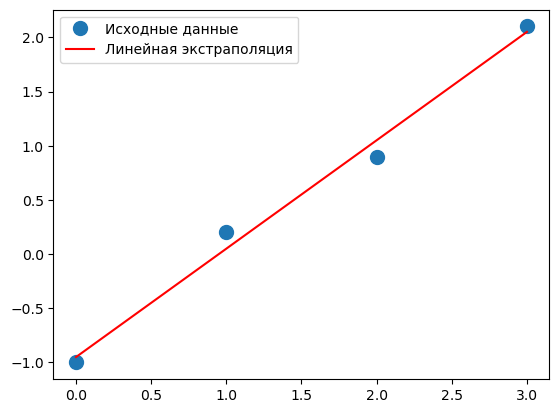

In [3]:
#Построим график полученной прямой и укажем на нем точки.
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', label='Исходные данные', markersize=10)
plt.plot(x, m*x + c, 'r', label='Линейная экстраполяция')
plt.legend()
print("График прямой y = mx + b:")
plt.show()

# 1.1.2. Пример

## Задача:

Пусть 𝑥, 𝑦 – вектора длиной 𝑛 > 3 (точек > 3). Задача заключается в
построении эстраполяционного полинома второго порядка (параболы). Таким
образом, необходимо найти такие коэффициенты полинома 𝑎, 𝑏, 𝑐 по методу
наименьших квадратов. Данные могут быть получены в результате
измерений. Покажем пример генерации данных случайным образом и
загрузки их из файла.

## Решение:

Сгенерированные случайные координаты:

x:

[-5.47686904 -4.02452539 -3.11650909 -1.75017597 -0.64215587 -0.19384134
  0.72135514  2.11616035  3.46419306  3.96532905  4.84259505]

y:

[25.0074712  16.27933495  8.50108047  4.07937607  0.51484382 -0.04241331
  1.14681537  4.32007638  8.90240659 16.04253663 25.16803929]

Эстраполяционный полином второго порядка (парабола) у = ax 2 + bx + с:


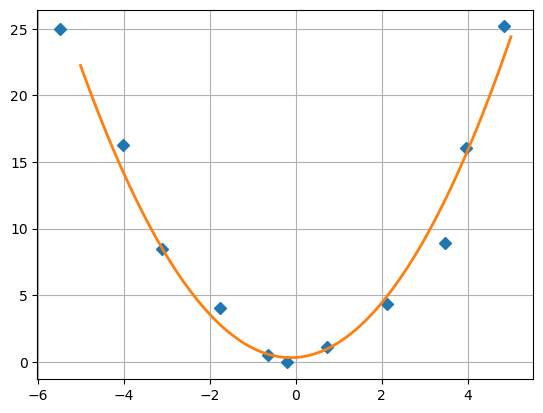

In [3]:
from numpy import *
from numpy.random import *
import numpy as np
import matplotlib.pyplot as plt
#генерируем случайные х и у
delta = 1.0
x = linspace(-5,5,11)
y = x**2+delta*(rand(11)-0.5)

x += delta*(rand(11)-0.5)
#записываем данные в файл
x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', '\n')

# читаем данные из файлов
x = fromfile('x_data.txt', float, sep='\n')
y = fromfile('y_data.txt', float, sep='\n')

print("Сгенерированные случайные координаты:\n")
print("x:\n")
print(x)
print("\ny:\n")
print(y)

# Нахождение коэффициентов функции вида у = ax 2 + bx + с методом наименьших квадратов
# задаем вектор т = [x**2, x, E]
m = vstack((x**2, x, ones(11))).T
# находим коэффициенты при составляющих вектора т
s = np.linalg.lstsq(m, y, rcond = None)[0]

# на отрезке [-5,5]
x_prec = linspace(-5, 5, 101)
# рисуем точки
plt.plot(x, y, 'D')
# рисуем кривую вида у = ax*2 + bx + с, подставляя из решения коэффициенты s[0], s[1], s[2]
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec + s[2], "-", lw=2)
plt.grid()
print("\nЭстраполяционный полином второго порядка (парабола) у = ax 2 + bx + с:")
plt.savefig('парабола.png')

# 1.1.3 Пример

## Задача:

По данным предыдущего примера постройте эстраполяционный полином
третьего порядка.

## Решение:


Эстраполяционный полином третьего порядка у = ax*3 + bx*2 + сх + d:


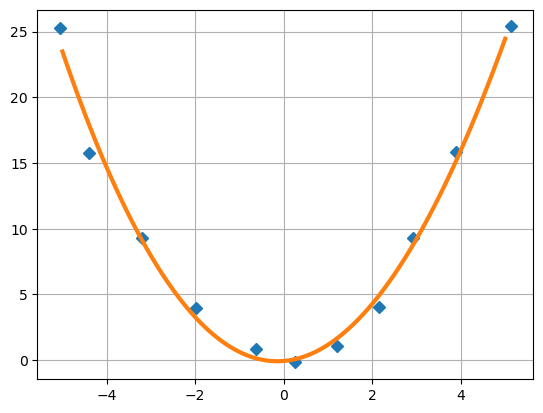

In [2]:
#Решение
# Нахождение коэффициентов функции вида у = ax*3 + bx*2 + сх + d методом наименьших квадратов
# задаем вектор m = [x**3, x, E]
m = vstack((x**3, x**2, x, ones(11))).T
# находим коэффициенты при составляющих вектора т
s = np.linalg.lstsq(m, y, rcond = None)[0]

# на отрезке [-5,5]
x_prec = linspace(-5, 5, 101)
# рисуем точки
plt.plot(x, y, 'D')
# рисуем кривую вида у = ax*3 + bx*2 + cx + d, подставляя из решения коэффициенты s[0], s[1], s[2], s[3]
plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2 + s[2]*x_prec + s[3],'-', lw = 3)
plt.grid()
print("\nЭстраполяционный полином третьего порядка у = ax*3 + bx*2 + сх + d:")
plt.savefig('полином 3-й степени.png')

# Задание

## Задача:

Представьте собственные данные и постройте экстраполяцию полиномами
первой, второй и третьей степени.

## Решение:

Экстраполяция полиномами первой, второй и третьей степени:


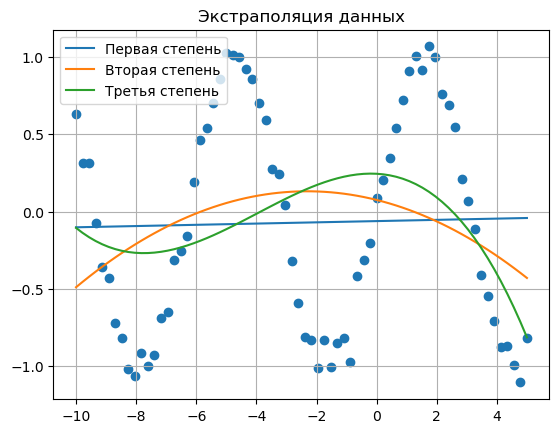

In [89]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 5, 70)
y = np.sin(x) + np.random.normal(0, 0.1, 70)

# Полиномы первой, второй, третьей степени
p1 = np.poly1d(np.polyfit(x, y, 1))
p2 = np.poly1d(np.polyfit(x, y, 2))
p3 = np.poly1d(np.polyfit(x, y, 3))

# График
plt.scatter(x, y)
plt.plot(x, p1(x), label="Первая степень")
plt.plot(x, p2(x), label="Вторая степень")
plt.plot(x, p3(x), label="Третья степень")
plt.title('Экстраполяция данных')
plt.grid()
plt.legend()
print("Экстраполяция полиномами первой, второй и третьей степени:")
plt.show()

# 1.1.4 Пример

## Задача:

Необходимо проверить гипотезу, что наша точечно заданная функция ложится на кривую вида: $$ f(x, b) = b_0 + b_1exp(−b_2x^2). $$

## Решение:

In [17]:
import scipy as sp

#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75, 0.5)
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x**2)
# зададим массив точек xi
xdata = np.linspace(0, 5, 50)
# создаем теоретически правильные значения точек уi (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
#Используем функцию для получения решения в виде коэффициентов функции f(x) для указанных xdata u ydata
from scipy.optimize import curve_fit
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
beta_opt
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print("Линейное отклонение:")
print(lin_dev)

Линейное отклонение:
0.0002607425504082562


In [18]:
#Вычислим квадратичное отклонение
residuals = ydata - f(xdata,*beta_opt)
fres = sum(residuals**2)
print("Квадратичное отклонение:")
print(fres)

Квадратичное отклонение:
0.1377335897572304


График точечной функции и кривой b0 + b1exp(−b2x^2):


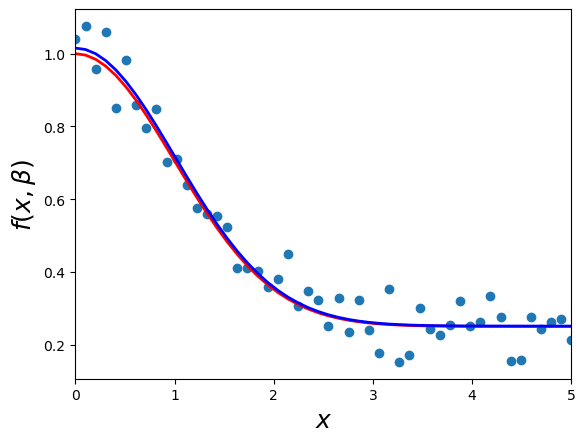

In [21]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
print("График точечной функции и кривой b0 + b1exp(−b2x^2):")
plt.show()

In [25]:
print("Координата X:", end="\n\n")
print(xdata)
print("\nКоордината Y:", end="\n\n")
print(ydata)

Координата X:

[0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ]

Координата Y:

[1.04069109 1.07633007 0.95901273 1.05839665 0.85062025 0.98186984
 0.85760069 0.79571217 0.84860989 0.70133779 0.71126127 0.63817384
 0.57460833 0.55819572 0.55478606 0.52418578 0.40924911 0.41179924
 0.4024439  0.35963985 0.38164389 0.448369   0.30497479 0.34815597
 0.32125302 0.25092385 0.32774865 0.2338146  0.32274511 0.23874565
 0.17782018 0.35313015 0.15230578 0.17236696 0.3003164  0.24349678
 0.2263

# 1.1.5 Пример

## Задача:

Необходимо проверить гипотезу, что наша точечно заданная функция ложится на кривые вида:

1. $$ f(x, b) = b_0 + b_1x $$
2. $$ f(x, b) = b_0 + b_1x + b_2x^2 $$
3. $$ f(x, b) = b_0 + b_1ln(x) $$
4. $$ f(x, b) = b_0 x^{b_1} $$

## Решение:

[0.24974736 0.75092146]
9.084615905617786e-05
0.07988196719295179


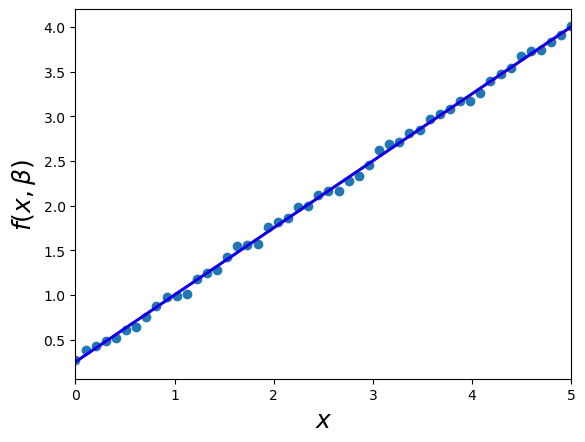

In [26]:
import scipy as sp
from scipy.optimize import curve_fit

# добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (0.25, 0.75)
beta = (0.25, 0.75)
def f(x, b0, b1):
    return b0 + b1 * x

# зададим массив точек xi
xdata = np.linspace(0, 5, 50)

# создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)

# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))

# используем функцию для получения решения в виде коэффициентов функции f(x) для указанных xdata и ydata
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print("Коэффициенты:")
print(beta_opt)

# вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print("Линейное отклонение:")
print(lin_dev)

# вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print("Квадратичное отклонение:")
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

[0.23286949 0.74834004 0.50061653]
0.00016228465533668743
0.1353284138220067


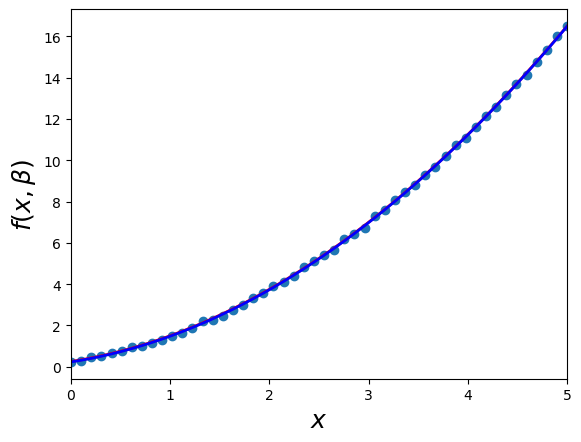

In [4]:
import scipy as sp
from scipy.optimize import curve_fit

# 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑥 + 𝑏2𝑥^2
# добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (0.25, 0.75, 0.5)
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x * x

# зададим массив точек xi
xdata = np.linspace(0, 5, 50)

# создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)

# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))

# используем функцию для получения решения в виде коэффициентов функции f(x) для указанных xdata и ydata
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print("Коэффициенты:")
print(beta_opt)

# вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print("Линейное отклонение:")
print(lin_dev)

# вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print("Квадратичное отклонение:")
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

[1.00397205 1.99449044]
4.2750280150500924e-05
0.09885752100731338


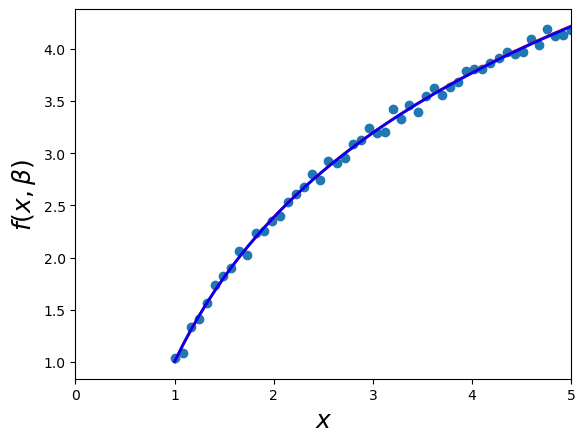

In [5]:
# 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑙𝑛(𝑥)
# добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (1, 2)
beta = (1, 2)
def f(x, b0, b1):
    return b0 + b1 * np.log(x)

# зададим массив точек xi
xdata = np.linspace(1, 5, 50)

# создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)

# зашумляем эти данные
import scipy as sp
from scipy.optimize import curve_fit
ydata = y + 0.05 * np.random.randn(len(xdata))
# используем функцию для получения решения в виде коэффициентов функции f(x) для указанных xdata и ydata
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print("Коэффициенты:")
print(beta_opt)

# вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print("Линейное отклонение:")
print(lin_dev)

# вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print("Квадратичное отклонение:")
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

[0.98912711 2.00002151]
Линейное отклонение:
0.00011060614289626236
Квадратичное отклонение:
0.13990440997541528


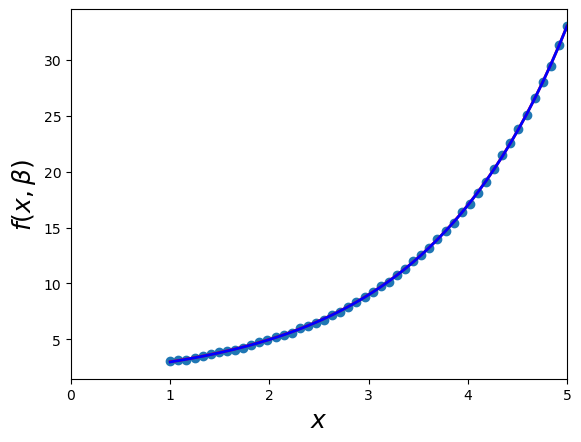

In [27]:
# 𝑓(𝑥, 𝑏) = 𝑏0 𝑥^(𝑏1)
# добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (1, 2)
beta = (1, 2)
def f(x, b0, b1):
    return b0 + b1 ** x

# зададим массив точек xi
xdata = np.linspace(1, 5, 50)

# создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)

# зашумляем эти данные
import scipy as sp
from scipy.optimize import curve_fit
ydata = y + 0.05 * np.random.randn(len(xdata))
# используем функцию для получения решения в виде коэффициентов фанкции f(x) для указанных xdata и ydata
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print("Коэффициенты:")
print(beta_opt)

# вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print("Линейное отклонение:")
print(lin_dev)

# вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print("Квадратичное отклонение:")
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

# Задание

## Задача:

Подставьте собственные данные и поэкспериментируйте с представленными функциями. Проанализируйте динамику изменения данных.

## Решение:

Коэффициенты: [0.264 0.75 ]
Линейное отклонение: 0.0002
Квадратичное отклонение: 0.187


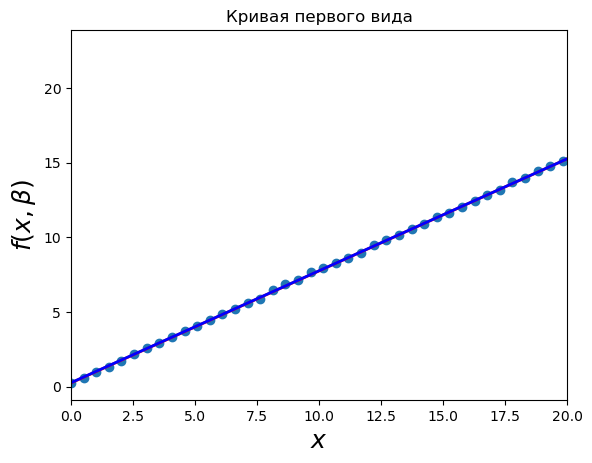

In [28]:
import scipy as sp
from scipy.optimize import curve_fit

# f(x, b) = b0 + b1x
# Добавляем шума в данные, сделанные по функции f(x, b) с коэффициентами b = (0.25, 0.75)
beta = (0.25, 0.75)
def f(x, b0, b1):
    return b0 + b1 * x

# Задаём массив точек xi
xdata = np.linspace(0, 30, 60) # изменили число точек

# Создаём теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)

# Зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))

# Используем функцию для получения решения в виде коэффициентов функции f(x) для указанных xdata и ydata
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(f'Коэффициенты: {beta_opt.round(3)}')

# Вычисляем линейное отклонение
lin_dev = sum(beta_cov[0])
print(f'Линейное отклонение: {lin_dev.round(4)}')

# Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(f'Квадратичное отклонение: {fres.round(3)}')

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 20) # изменили число точек
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.title('Кривая первого вида')
plt.show()

Коэффициенты: [0.247 0.751 0.5  ]
Линейное отклонение: 0.0001
Квадратичное отклонение: 0.253


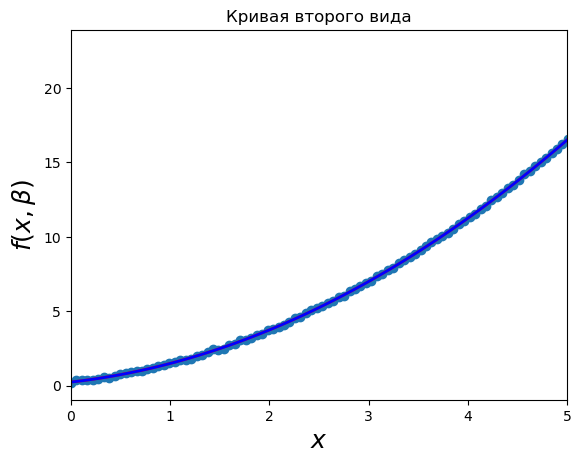

In [29]:
# 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑥 + 𝑏2𝑥^2
# Добавляем шума в данные, сделанные по функции f(x, b) с коэффициентами b = (0.25, 0.75, 0.5)
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x * x

# Задаём массив точек xi
xdata = np.linspace(0, 6, 110) # изменили число точек

# Создаём теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)

# Зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))

# Используем функцию для получения решения в виде коэффициентов фанкции f(x) для указанных xdata и ydata
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(f'Коэффициенты: {beta_opt.round(3)}')

# Вычисляем линейное отклонение
lin_dev = sum(beta_cov[0])
print(f'Линейное отклонение: {lin_dev.round(4)}')

# Вычисляем квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(f'Квадратичное отклонение: {fres.round(3)}')

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.title('Кривая второго вида')
plt.show()

Коэффициенты: [2.001 1.992]
Линейное отклонение: -0.0002
Квадратичное отклонение: 0.167


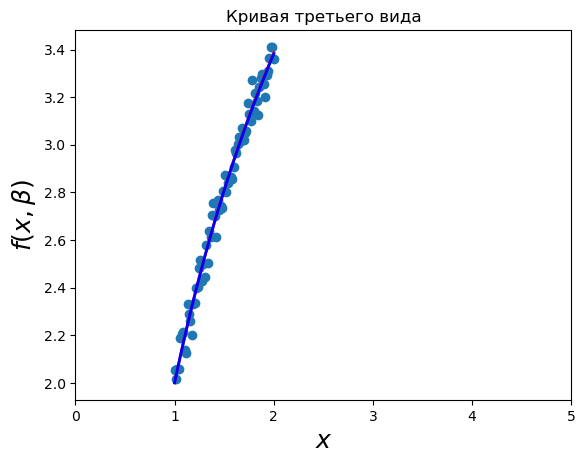

In [30]:
# 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑙𝑛(𝑥)
# Добавляем шума в данные, сделанные по функции f(x, b) с коэффициентами b = (1, 2)
beta = (2, 2) # изменение шума
def f(x, b0, b1):
    return b0 + b1 * np.log(x)

# Задаём массив точек xi
xdata = np.linspace(1, 2, 70)

# Создаём теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)

# Зашумляем эти данные
import scipy as sp
from scipy.optimize import curve_fit
ydata = y + 0.05 * np.random.randn(len(xdata))

# Используем функцию для получения решения в виде коэффициентов фанкции f(x) для указанных xdata и ydata
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(f'Коэффициенты: {beta_opt.round(3)}')

# Вычисляем линейное отклонение
lin_dev = sum(beta_cov[0])
print(f'Линейное отклонение: {lin_dev.round(4)}')

# Вычисляем квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(f'Квадратичное отклонение: {fres.round(3)}')

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.title('Кривая третьего вида')
plt.show()

Коэффициенты: [1.019 1.994]
Линейное отклонение: 0.0019
Квадратичное отклонение: 0.007


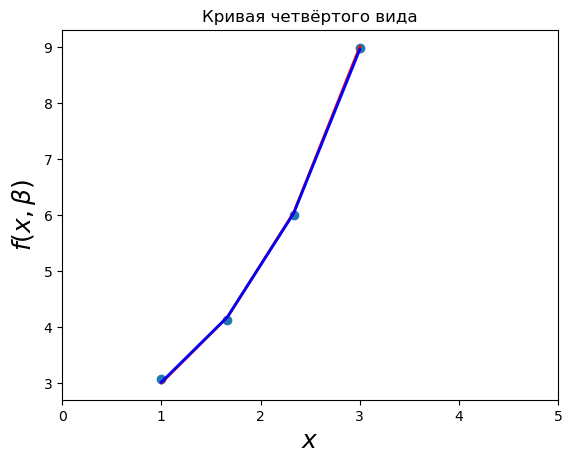

In [32]:
# 𝑓(𝑥, 𝑏) = 𝑏0 𝑥^(𝑏1)
# Добавляем шума в данные, сделанные по функции f(x, b) с коэффициентами b = (1, 2)
beta = (1, 2)
def f(x, b0, b1):
    return b0 + b1 ** x

# Задаём массив точек xi
xdata = np.linspace(1, 3, 4) # изменили число точек

# Создаём теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)

# Зашумляем эти данные
import scipy as sp
from scipy.optimize import curve_fit
ydata = y + 0.05 * np.random.randn(len(xdata))
# Используем функцию для получения решения в виде коэффициентов фанкции f(x) для указанных xdata и ydata
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(f'Коэффициенты: {beta_opt.round(3)}')

# Вычисляем линейное отклонение
lin_dev = sum(beta_cov[0])
print(f'Линейное отклонение: {lin_dev.round(4)}')

# Вычисляем квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(f'Квадратичное отклонение: {fres.round(3)}')

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.title('Кривая четвёртого вида')
plt.show()

# 1.2 Теоретический материал - Задачи регресии

Линейная регрессия - это широко используемый метод статистического анализа, который использует регрессионный анализ в математической статистике для определения количественной взаимосвязи между двумя или более переменными. Если регрессионный анализ включает две или более независимых переменных, а связь между зависимой и независимой переменными является линейной, тогда имееи дело с множественной линейной регрессией.

В этом разделе мы увидим, как библиотеку Scikit-Learn в Python для машинного обучения можно использовать для реализации функций регрессии. Мы начнем с простой линейной регрессии с участием двух переменных, а затем перейдем к линейной регрессии с участием нескольких переменных.

# 1.2.1 Пример

## Задача:

Построим простую линейную регрессию в Python с использованием библиотеки scikit-learn

## Решение:

In [4]:
#Импортируем необходимые библиотеки
#используем pandas и numpy для обработки данных,
#matplotlib для визуализации и sklearn для обучения наборов данных и импорта моделей. import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#создадим набор данных для описания взаимосбязи между временем обучения студентов и успебаемостью
my_dict = {"Учебное время": [0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,
5.e0,5.50], "Оценка": [10,22,13,43,20,22,33,50,62,48,55,75,62,73,81,76,64,82,90,93]}
dataset = pd.DataFrame(my_dict)
print("Линейная регрессия:")
dataset.head()

Линейная регрессия:


,Учебное время,Оценка
0,0.50,10
1,0.75,22
2,1.00,13
3,1.25,43
4,1.50,20


In [5]:
#Исследуем набор данных
print("Форма:")
print(dataset.shape)
print("Набор данных:")
dataset. describe()

Форма:
(20, 2)
Набор данных:


,Учебное время,Оценка
count,20.000000,20.000000
mean,2.787500,53.700000
std,1.507165,26.435821
min,0.500000,10.000000
25%,1.687500,30.250000
50%,2.625000,58.500000
75%,4.062500,75.250000
max,5.500000,93.000000


Точечная диаграмма:


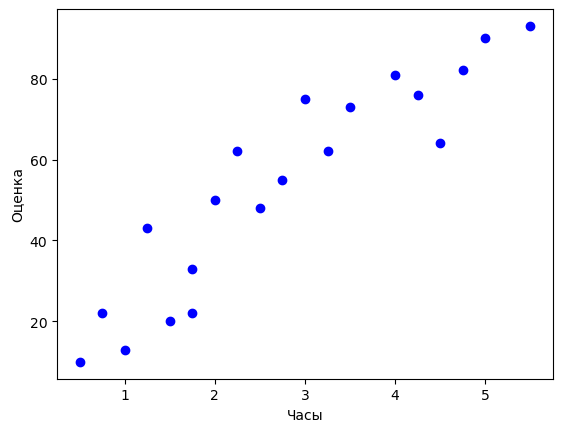

In [6]:
# Нарисуем точечную диаграмму
plt.scatter (dataset['Учебное время'], dataset['Оценка'], color = 'b', label = "данные экзамена")
plt.xlabel("Часы")
plt.ylabel("Оценка")
print("Точечная диаграмма:")
plt.show()

После того как мы получили представление о данных, разделим информацию на «атрибуты» и «метки». Атрибуты – это независимые переменные, а метки – это зависимые переменные, значения которых должны быть предсказаны. В нашем наборе всего два столбца и необходимо предсказать оценку в зависимости от количества часов. Чтобы извлечь атрибуты и метки, выполните следующий скрипт:

## Решение:

In [7]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print("Атрибуты и метки:")
print(X)
print(y)

Атрибуты и метки:
[[0.5 ]
 [0.75]
 [1.  ]
 [1.25]
 [1.5 ]
 [1.75]
 [1.75]
 [2.  ]
 [2.25]
 [2.5 ]
 [2.75]
 [3.  ]
 [3.25]
 [3.5 ]
 [4.  ]
 [4.25]
 [4.5 ]
 [4.75]
 [5.  ]
 [5.5 ]]
[10 22 13 43 20 22 33 50 62 48 55 75 62 73 81 76 64 82 90 93]


In [9]:
# Теперь, когда у нас есть атрибуты и метки, необходимо разделить их на обучающий и тестовый наборы.
# Приведенный фрагмент разделяет 80% данных на обучающий набор, а 20% данных - на набар тестов
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# далее можно обучить алгоритм линейной регрессии
# необходимо импортировать класс LinearRegression, создать его экземпляр и вызвать метод fit()
print("Имопртированный класс:")
regressor = LinearRegression()
regressor.fit(X_train, y_train)

Имопртированный класс:


LinearRegression()

In [10]:
#приведем получившиеся коэффициенты для линии регрессии print(regressor.intercept
print("Получившиеся коэффициенты для линии регрессии:")
print(regressor.intercept_)
print(regressor.coef_)

Получившиеся коэффициенты для линии регрессии:
5.475400029908791
[17.02706744]


Получившийся результат можно интерпретировать следующим образом: с каждым затраченным часом на обучение результат экзамена повышается приблизительно на 17 баллов. Далее можно построить прогнозы. Для этого мы будем использовать наши тестовые данные и посмотрим, насколько точно наш алгоритм предсказывает процентную оценку. Чтобы сделать прогноз на тестовых данных необходимо выполнить следующий код:

## Решение:

In [11]:
y_pred = regressor.predict(X_test)
# сравним фактические значения с прогнозируемыми
dataframe = pd.DataFrame({'Актуальные': y_test, 'Прогнозируемые': y_pred})
print("Сравнение актуальных значений и прогнозируемых:")
dataframe

Сравнение актуальных значений и прогнозируемых:


,Актуальные,Прогнозируемые
0,90,90.610737
1,22,18.245701
2,93,99.124271
3,62,43.786302


Гистограмма сравнения актуальных значений и прогнозируемых:


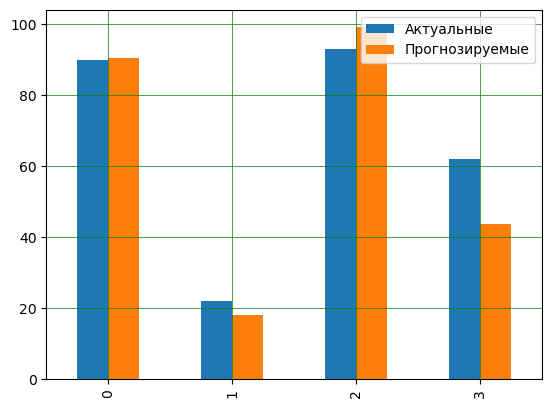

In [12]:
# визуализируем результат сравнения в виде гистограммы
dataframe.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
print("Гистограмма сравнения актуальных значений и прогнозируемых:")
plt.show()

График линейной регрессии с тестовыми данными:


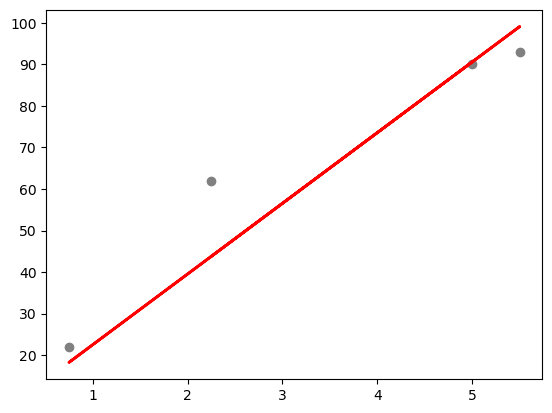

In [13]:
#построим линию регрессии с тестовыми данными
plt.scatter(X_test, y_test, color="gray")
plt.plot(X_test, y_pred, color='red', linewidth=2)
print("График линейной регрессии с тестовыми данными:")
plt.show()

# Задание

## Задача:

Постройте модель линейной регрессии для произвольных данных из двух столбцов. Для примера можно взять точечную зависимость заработной платы от
опыта работы:

(https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linearregression/master/Salary_Data.csv).

Найдите коэффициенты линии регрессии. Постройте прогноз.

## Решение:

Коэффициенты линии регрессии: b0 = 26780.099, b1 = 9312.575


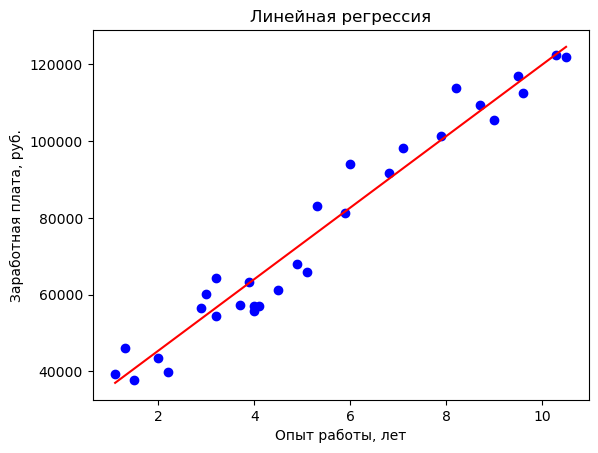

   Фактический  Прогнозируемый
0      37731.0       40748.962
1     122391.0      122699.623
2      57081.0       64961.657
3      63218.0       63099.142
4     116969.0      115249.563
5     109431.0      107799.503


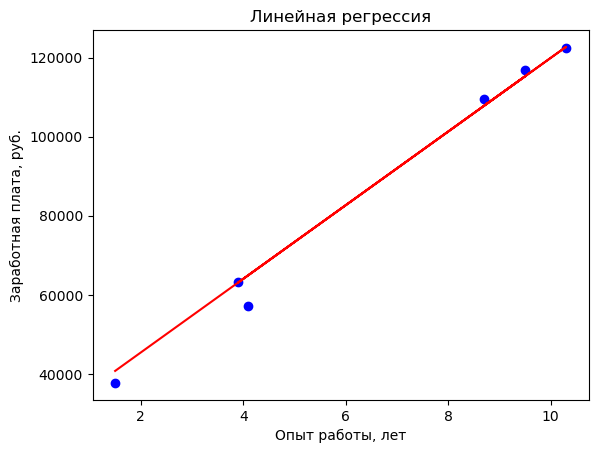

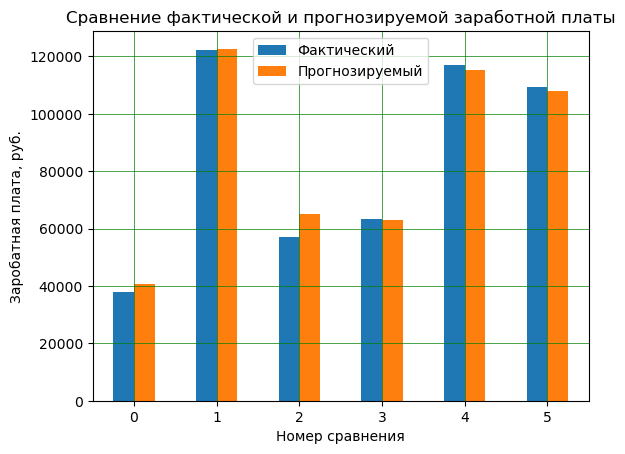

Прогноз заработной платы для опыта работы в 10 лет: 119905.850
Прогноз заработной платы для опыта работы в 15 лет: 166468.730
Прогноз заработной платы для опыта работы в 20 лет: 213031.600
Прогноз заработной платы для опыта работы в 25 лет: 259594.480


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Загружаем данные из csv-файла
dataframe = pd.read_csv('https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv')

# Разделяем данные на атрибуты и метки
X = dataframe.iloc[:, :-1].values
y = dataframe.iloc[:, -1].values

# Разделяем атрибуты и метки на обучающий и тестовый наборы.
# Приведенный фрагмент разделяет 80% данных на обучающий набор, а 20% данных - на набор тестов
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Создаём объект модели линейной регрессии
regressor = LinearRegression()

# Обучаем модель на данных на обучающей выборке
regressor.fit(X_train, y_train)

# Получаем коэффициенты линии регрессии
b0 = regressor.intercept_
b1 = regressor.coef_[0]

# Выводим коэффициенты
print('Коэффициенты линии регрессии: b0 = {:.3f}, b1 = {:.3f}'.format(b0, b1))

# Строим график данных и линию регресси для обучающей выборки
plt.scatter(X, y, color='blue')
plt.plot(X, regressor.predict(X), color='red')
plt.title('Линейная регрессия')
plt.xlabel('Опыт работы, лет')
plt.ylabel('Заработная плата, руб.')
plt.show()

# Строим прогноз на тестовой выборке
y_pred = regressor.predict(X_test)

# Сравниваем фактические значения с прогнозируемыми
dataframe = pd.DataFrame({'Фактический' : y_test.round(3), 'Прогнозируемый' : y_pred.round(3)})
print(dataframe)

# Строим график данных и линию регресси для тестовой выборки
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.title('Линейная регрессия')
plt.xlabel('Опыт работы, лет')
plt.ylabel('Заработная плата, руб.')
plt.show

# Визуализируем результат сравнения в виде гистограммы
dataframe.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Сравнение фактической и прогнозируемой заработной платы')
plt.xlabel('Номер сравнения')
plt.xticks(rotation=0)
plt.ylabel('Заробатная плата, руб.')
plt.show()

# Делаем прогноз для новых данных
new_X = [[10], [15], [20], [25]]
Y = regressor.predict(new_X)
print(f'Прогноз заработной платы для опыта работы в 10 лет: {round(Y[0], 2):.3f}')
print(f'Прогноз заработной платы для опыта работы в 15 лет: {round(Y[1], 2):.3f}')
print(f'Прогноз заработной платы для опыта работы в 20 лет: {round(Y[2], 2):.3f}')
print(f'Прогноз заработной платы для опыта работы в 25 лет: {round(Y[3], 2):.3f}')

# 1.3. Теоретический материал - Множественная регрессия

В предыдущем примере мы проиллюстрировали линейную регрессию с двумя переменными. Однако, почти все реальные задачи имеют больше параметров. Линейная регрессия с участием нескольких переменных называется «множественной линейной регрессией» или многомерной линейной регрессией. Шаги для выполнения множественной линейной регрессии аналогичны шагам для простой. Разница заключается в оценке. Вы можете использовать множественную регрессию, чтобы узнать, какой фактор оказывает наибольшее влияние на прогнозируемый результат или как различные переменные связаны друг с другом.

# 1.3.1 Пример

## Задача:

Для решения задачи множественной регрессии можно задействовать уже известный метод numpy.linalg.lstsq.

## Решение:

In [19]:
import numpy as np
y = [1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1]
X = [[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5],
     [4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6],
     [4,1,2,5,6,7,8,9,7,8,7,8,7,4,3,1,2,3,4,1,3,9,7]]
X = np.transpose(X) # transpose so input vectors
X = np.c_[X, np.ones(X.shape[0])] # add bias term
linreg = np.linalg.lstsq(X, y, rcond=None)[0]
print("")
print(linreg)


[ 0.1338682   0.26840334 -0.02874936  1.5122571 ]


Кроме этого можно использовать возможности библиотеки sсikit-learn. Рассмотрим пример.

# 1.3.2 Пример

## Задача:

Для данных из предыдущей задачи построить модель множественной линейной регрессии с использованием средств библиотеки sсikit-learn

## Решение:

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

y = [1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1]
X = [[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5],
     [4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6],
     [4,1,2,5,6,7,8,9,7,8,7,8,7,4,3,1,2,3,4,1,3,9,7]]

# формируем DataFrame из двух списков
new_y = np.array(y)
new_y = new_y.transpose()
df1 = pd.DataFrame(new_y)
new_X = np. array(X)
new_X = new_X.transpose()
df2 = pd.DataFrame(new_X)
df1 = df1.rename(columns = {0: 'y'}, inplace = False)
df2 = df2.rename(columns = {0: 'x1', 1: 'x2', 2: 'x3'}, inplace = False)

print("Дата фрейм:")
frames = [df1, df2]
dataset = pd.concat([df1, df2], axis=1, join="inner")
dataset.head()

Дата фрейм:


,y,x1,x2,x3
0,1,0,4,4
1,2,2,1,1
2,3,4,2,2
3,4,1,3,5
4,3,5,4,6


In [31]:
# изучим данные
print(dataset.shape)
print("Полученные данные:")
dataset.describe()

(23, 4)
Полученные данные:


,y,x1,x2,x3
count,23.000000,23.000000,23.000000,23.000000
mean,3.565217,5.347826,5.521739,5.043478
std,1.674029,2.404706,2.428422,2.704849
min,0.000000,0.000000,1.000000,1.000000
25%,3.000000,4.500000,4.000000,3.000000
50%,4.000000,5.000000,6.000000,5.000000
75%,5.000000,6.500000,7.500000,7.000000
max,6.000000,9.000000,9.000000,9.000000


In [61]:
# разделим данные на метки и атрибуты
X = dataset[['x1', 'x2', 'x3']]
y = dataset['y']
# разделим данные на обучашую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Для обучения алгоритма мы выполняем тот же код, что и раньше, используя метод fin() класса LinearRegression
print("Класс LinearRegression:")
regressor = LinearRegression()
regressor.fit(X_train, y_train)

Класс LinearRegression:


LinearRegression()

In [62]:
#выведем коэффициенты модели
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
x1,0.224734
x2,0.364703
x3,-0.183665


In [63]:
#Чтобы сделать прогнозы на тестовых данных, выполните следующий код
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
20,1,2.677307
17,0,5.005493
3,4,1.915711
13,5,5.496030
19,3,3.409341


In [64]:
#Последний - сценить произбодительность алгоритма, Мы сделаем это, майдл значения для MSE
print("Mean Squared Error", metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error 6.5252367347298135


# Задание

## Задача:

Постройте модель множественной линейной регрессии для произвольных данных из нескольких столбцов. Для примера можно взять потребления газа (в миллионах галлонов) в 48 штатах США или набор данных о качестве красного вина (1) и (2) соответственно. Найдите коэффициенты множественной регрессии. Постройте прогноз.

1. https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv
2. https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv

## Решение:

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Загружаем данные из csv-файла
url = 'https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv'
dataframe = pd.read_csv(url)
dataframe = dataframe.rename(columns={'Petrol_tax': 'Налог на бензин',
                            'Average_income': 'Средний доход',
                            'Paved_Highways': 'Асфальтированные дороги',
                            'Population_Driver_licence(%)': 'Население с водительскими правами (%)',
                            'Petrol_Consumption': 'Потребление бензина'})
dataframe.describe()

,Налог на бензин,Средний доход,Асфальтированные дороги,Население с водительскими правами (%),Потребление бензина
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [70]:
# Разделяем данные на атррибуты (первые 4 стобца) и метки (последний столбец)
X = dataframe.drop('Потребление бензина', axis=1)
y = dataframe['Потребление бензина']

# Разделяем данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Строим модель множественной линейной регрессии
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Выводим коэффициенты множественной регрессии
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Коэффициент'])
print(coeff_df.round(3))

                                       Коэффициент
Налог на бензин                            -40.017
Средний доход                               -0.065
Асфальтированные дороги                     -0.005
Население с водительскими правами (%)     1341.862


In [72]:
# Прогнозируем значения потребления топлива
y_pred = regressor.predict(X_test)
dataframe = pd.DataFrame({'Фактический' : y_test.round(3), 'Прогнозируемый' : y_pred.round(3)})
print(dataframe)

print(f"\nСреднеквадратичная ошибка: {metrics.mean_squared_error(y_test, y_pred):.3f}")

    Фактический  Прогнозируемый
29          534         469.392
4           410         545.645
26          577         589.668
30          571         569.730
32          577         649.775
37          704         646.631
34          487         511.608
40          587         672.475
7           467         502.075
10          580         501.271

Среднеквадратичная ошибка: 4666.345


# Задание*

## Задача:

Экспериментально получены N − значений величины Y при различных значениях величины X. Построить полиномы первой и второй степени, аппроксимирующие результаты эксперимента, с применением метода наименьших квадратов. Результаты  выводятся в виде таблиц значений и графиков, полученных полиномов.

## Решение:

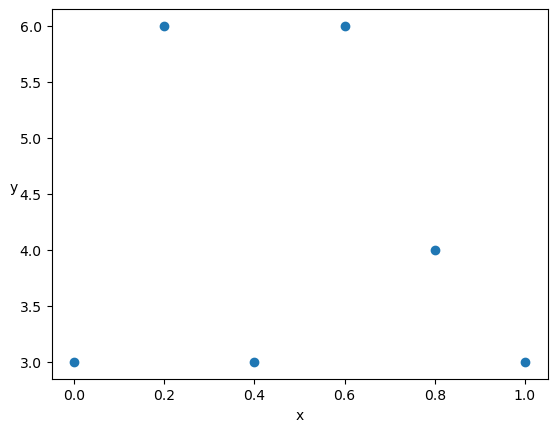

In [75]:
import numpy as np

X = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
Y = np.array([3.0, 6.0, 3.0, 6.0, 4.0, 3.0])

# Построение графика
plt.scatter(X, Y)
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.show()

In [80]:
# Построим полиномы первой и второй степени
p1 = np.poly1d(np.polyfit(X, Y, 1))
print("Уравнение полинома первой степени: y = {:.2f}x + {:.2f}".format(p1[0], p1[1]))
p2 = np.poly1d(np.polyfit(X, Y, 2))
print("Уравнение полинома второй степени: y = {:.2f}x^2 + {:.2f}x + {:.2f}".format(p2[0], p2[1], p2[2]))

Уравнение полинома первой степени: y = 4.38x + -0.43
Уравнение полинома второй степени: y = 3.43x^2 + 6.71x + -7.14


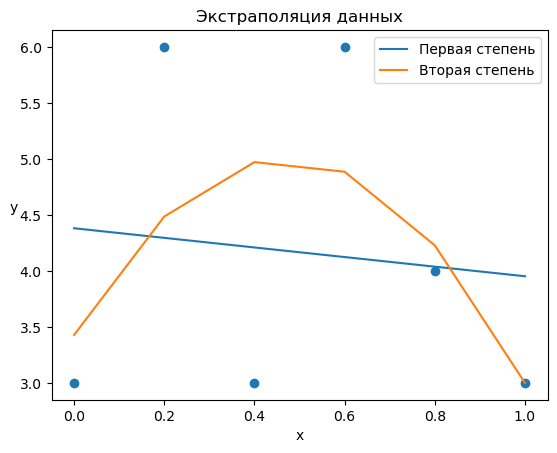

In [81]:
# Нарисуем графики
plt.scatter(X, Y)
plt.plot(X, p1(X), label="Первая степень")
plt.plot(X, p2(X), label="Вторая степень")
plt.title('Экстраполяция данных')
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.legend()
plt.show()

In [88]:
# Вывод таблицы значений
print("x\t\ty\t\ty (полином 1)\ty (полином 2)")
for i in range(len(X)):
    F1 = np.polyval(p1, X[i])
    F2 = np.polyval(p2, X[i])
    print("{:.2f}\t\t{:.2f}\t\t{:.2f}\t\t{:.2f}".format(X[i], Y[i], F1, F2))

x		y		y (полином 1)	y (полином 2)
0.00		3.00		4.38		3.43
0.20		6.00		4.30		4.49
0.40		3.00		4.21		4.97
0.60		6.00		4.12		4.89
0.80		4.00		4.04		4.23
1.00		3.00		3.95		3.00
